In [77]:
import jaccard_similiarity
domain = "nba"
site_a = "site-a"
site_b = "site-b"

scores = []
page_to_link = 2
total_pages = 40
while ( page_to_link < total_pages ):
    scores.append(jaccard_similiarity.entity_linkage(domain, site_a, site_b, page_to_link))
    page_to_link += 1

Number of pages:  2
Number of pages:  3
Number of pages:  4
Number of pages:  5
Number of pages:  6
Number of pages:  7
Number of pages:  8
Number of pages:  9
Number of pages:  10
Number of pages:  11
Number of pages:  12
Number of pages:  13
Number of pages:  14
Number of pages:  15
Number of pages:  16
Number of pages:  17
Number of pages:  18
Number of pages:  19
Number of pages:  20
Number of pages:  21
Number of pages:  22
Number of pages:  23
Number of pages:  24
Number of pages:  25
Number of pages:  26
Number of pages:  27
Number of pages:  28
Number of pages:  29
Number of pages:  30
Number of pages:  31
Number of pages:  32
Number of pages:  33
Number of pages:  34
Number of pages:  35
Number of pages:  36
Number of pages:  37
Number of pages:  38
Number of pages:  39


In [78]:
import matplotlib as mpl
import matplotlib.pyplot as plt

In [79]:
import numpy as np

def normalize_feature(feature, max_samples):
    last_feature = len(feature) - 1
    while last_feature < max_samples:
        repeated_feature = feature[last_feature]
        feature.append(repeated_feature)
        last_feature += 1

def normalize_samples(scores, max_samples):
    scores = scores.copy()
    for precisions, recalls in scores:
        normalize_feature(precisions, max_samples)
        normalize_feature(recalls, max_samples)
    return scores

def average_score(scores):
    precisions = map(lambda score: np.array(score[0]), scores)
    recalls = map(lambda score: np.array(score[1]), scores)
    
    average_precision = sum(precisions) / len(scores)
    average_recalls = sum(recalls) / len(scores)
    return average_precision, average_recalls

        

def plot_recall_precision(recall, precision):
    plt.plot(recall, precision)
    plt.axis([0, 1.1, 0, 1.1])

In [80]:
average_score(normalize_samples(scores, total_pages))

(array([1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 1.        ,
        1.        , 1.        , 1.        , 1.        , 0.99912281,
        0.99830221, 0.99671053, 0.99516547, 0.99366439, 0.99220486,
        0.99005365, 0.98940168, 0.98874659, 0.98808959, 0.98808959,
        0.98808959]),
 array([0.08561955, 0.17123911, 0.24370077, 0.3073905 , 0.36450128,
        0.4163489 , 0.46381056, 0.50751282, 0.54792561, 0.58541442,
        0.62027165, 0.65273653, 0.68300844, 0.71125605, 0.73762397,
        0.76223749, 0.78520628, 0.80662709, 0.8265859 , 0.84515967,
        0.86241766, 0.87842251, 0.89323119, 0.9068957 , 0.91946372,
        0.93097912, 0.94148236, 0.95101095, 0.95959968, 0.96645861,
        0.97246527, 0.9768

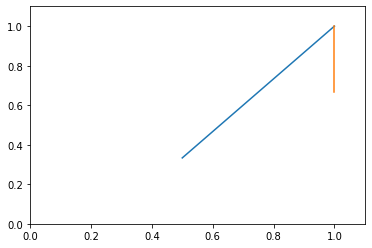

In [81]:
plot_recall_precision(scores[0], scores[1])